In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Sum the checkins
businesses = pd.read_csv("cleaned_merged.csv")
businesses[businesses.columns[12:]] = businesses[businesses.columns[12:]].fillna(value=0)
for x in range(0, 24):
    businesses['time.' + str(x)] = businesses['time.Mon-' + str(x)] + businesses['time.Tue-' + str(x)] + businesses['time.Wed-' + str(x)] + businesses['time.Thu-' + str(x)] + businesses['time.Fri-' + str(x)]+ businesses['time.Sat-' + str(x)] + businesses['time.Sun-' + str(x)]
businesses.drop(businesses.columns[12:180], axis=1, inplace=True)
businesses.drop(['NA'], axis=1, inplace=True)
    

In [4]:
businesses.head()

,business_id,address,attributes.RestaurantsPriceRange2,categories,city,latitude,longitude,name,postal_code,review_count,...,time.14,time.15,time.16,time.17,time.18,time.19,time.20,time.21,time.22,time.23
0,__8j8yhsmE98wNWHJNyAgw,254 Adelaide Street W,2,"Restaurants, Sushi Bars, Japanese",Toronto,43.648231,-79.389256,Urawa Sushi,M5H 1X6,81,...,0.0,2.0,15.0,6.0,7.0,3.0,6.0,10.0,3.0,13.0
1,__fMLrmv9M1_W4kBvR2VnQ,1212 Nevada Hwy,1,"Restaurants, Fast Food, Ice Cream & Frozen Yog...",Boulder City,35.972074,-114.849956,Dairy Queen,89005,19,...,0.0,1.0,0.0,1.0,2.0,3.0,9.0,12.0,11.0,11.0
2,__fyRzU8kL6HkVV3wgxfmQ,5171 Avenue du Parc,2,"Cabaret, Bars, Nightlife, Barbeque, Restaurant...",Montréal,45.520384,-73.597114,Mademoiselle Urban Restobar,H2V 4G3,6,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0
3,__IFWGnWgMJV-55JIQfzjw,1951 S Signal Butte Rd,2,"Nightlife, Tex-Mex, Restaurants, American (Tra...",Mesa,33.379586,-111.601235,Chili's,85209,100,...,0.0,0.0,0.0,3.0,21.0,37.0,30.0,22.0,16.0,27.0
4,__iqJ91sPngnwEa3nIQP8Q,5 Rue Morley,2,"Canadian (New), Portuguese, Restaurants",Greenfield Park,45.478104,-73.475822,Bocado Grill,J4V 2Y8,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,2.0


In [5]:
businesses.to_csv('cleaned_checkin', encoding='utf-8', index=False)

In [6]:
ClusterDF = businesses.drop(businesses.columns[1:11], axis=1)
ClusterDF = ClusterDF.set_index('business_id').stack().rename_axis(('business_id','time')).reset_index().rename(columns={0:'check_in_count'})
ClusterDF['time'] = ClusterDF['time'].str.replace('time.', '')
ClusterDF[['time', 'check_in_count']] = ClusterDF[['time', 'check_in_count']].astype(int)

In [7]:
ClusterDF.head()

,business_id,time,check_in_count
0,__8j8yhsmE98wNWHJNyAgw,0,7
1,__8j8yhsmE98wNWHJNyAgw,1,2
2,__8j8yhsmE98wNWHJNyAgw,2,1
3,__8j8yhsmE98wNWHJNyAgw,3,0
4,__8j8yhsmE98wNWHJNyAgw,4,0


In [8]:
ClusterDF.to_csv('checkincount_time_byid.csv', encoding='utf-8', index=False)

In [9]:
X = np.array(ClusterDF[['time','check_in_count']])

In [10]:
ClusterDF['check_in_count'].max()

3599

# K-means Clustering

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

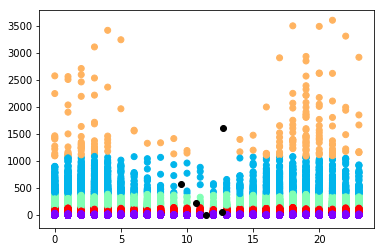

In [16]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')    
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 
plt.show()